In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
%matplotlib inline

# TODO: why on earth the simplest one is the best one???

# Exercise 12
### Download Credit.csv file from ISL homepage. Dataset is described here.  Create logistic regression models with possibly high prediction accuracy for predicting

In [42]:
df = pd.read_csv('../datasets/Credit.csv')

In [43]:
df.drop('Unnamed: 0', axis=1, inplace=True)

## Dataset preparation

### Get rid of string values

In [44]:
def create_dummy_variable(dataframe, column):
    try:
        dummy_encoding = pd.get_dummies(dataframe[column], prefix=column)
        dataframe.drop(column, axis=1, inplace=True)
        dataframe = pd.concat([dataframe, dummy_encoding], axis=1)
    except KeyError as e:
        print(f"Column '{column}' not found!")
    return dataframe

In [45]:
df = create_dummy_variable(df, 'Married')
df = create_dummy_variable(df, 'Ethnicity')
df = create_dummy_variable(df, 'Gender')
df = create_dummy_variable(df, 'Student')

In [46]:
df_a = df.copy(deep=True)
df_b = df.copy(deep=True)

### a) if a given person has an income greater than 50 (hint: create new indicator variable)

In [47]:
df_a['Income > 50'] = df_a.apply(lambda row: 'Yes' if row['Income'] > 50 else 'No', axis=1)
df_a

,Income,Limit,Rating,Cards,Age,Education,Balance,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Gender_Male,Student_No,Student_Yes,Income > 50
0,14.891,3606,283,2,34,11,333,0,1,0,0,1,0,1,1,0,No
1,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0,0,1,Yes
2,104.593,7075,514,4,71,11,580,1,0,0,1,0,0,1,1,0,Yes
3,148.924,9504,681,3,36,11,964,1,0,0,1,0,1,0,1,0,Yes
4,55.882,4897,357,2,68,16,331,0,1,0,0,1,0,1,1,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,0,1,0,0,1,0,1,1,0,No
396,13.364,3838,296,5,65,17,480,1,0,1,0,0,0,1,1,0,No
397,57.872,4171,321,5,67,12,138,0,1,0,0,1,1,0,1,0,Yes
398,37.728,2525,192,1,44,13,0,0,1,0,0,1,0,1,1,0,No


In [48]:
features = list(df_a.columns)
features.remove('Income > 50')
result = ['Income > 50']
X = df_a[features]
y = df_a[result]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [50]:
X_train

,Income,Limit,Rating,Cards,Age,Education,Balance,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Gender_Male,Student_No,Student_Yes
240,29.705,3351,262,5,71,14,148,0,1,0,1,0,1,0,1,0
375,20.974,5673,413,5,44,16,1000,0,1,0,0,1,1,0,1,0
135,44.473,3500,257,3,81,16,8,1,0,1,0,0,1,0,1,0
330,20.405,4543,329,2,72,17,1054,1,0,0,1,0,0,1,0,1
140,39.831,6045,459,3,32,12,1425,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,33.214,5137,387,3,59,9,661,1,0,1,0,0,0,1,1,0
16,53.598,3714,286,3,73,17,0,0,1,1,0,0,1,0,1,0
74,16.103,5390,418,4,45,10,945,0,1,0,0,1,1,0,1,0
176,24.050,2607,221,4,32,18,0,0,1,0,0,1,0,1,1,0


### b) how many credit cards a person has.

# Exercise 13

Repeat the previous exercise with the K-Nearest Neighbor and Decision Tree clas-sification models. You may use scikit-learn implementations: KNN and DT. 

For KNN check different values of parameter n_neighbors - the number of considered neighbours. 

For DT check different values of parameter max_depth - the maximum depth of a tree

## Prepare Dataset

In [51]:
df

,Income,Limit,Rating,Cards,Age,Education,Balance,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Gender_Male,Student_No,Student_Yes
0,14.891,3606,283,2,34,11,333,0,1,0,0,1,0,1,1,0
1,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0,0,1
2,104.593,7075,514,4,71,11,580,1,0,0,1,0,0,1,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0,1,0,1,0
4,55.882,4897,357,2,68,16,331,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,0,1,0,0,1,0,1,1,0
396,13.364,3838,296,5,65,17,480,1,0,1,0,0,0,1,1,0
397,57.872,4171,321,5,67,12,138,0,1,0,0,1,1,0,1,0
398,37.728,2525,192,1,44,13,0,0,1,0,0,1,0,1,1,0


## Grid Search with Cross Validation

In [52]:
def perform_grid_search_cv(model, parameters, X, y, cv=10, verbose=10, n_jobs=-1):
    grid_object = GridSearchCV(model, parameters, 
                               scoring='accuracy',
                               cv=cv, verbose=verbose, n_jobs=n_jobs, iid=True)
    grid_object.fit(X, y)
    return grid_object.best_estimator_

### K-Nearest Neighbour

In [53]:
params = {'n_neighbors': [3, 2,4,8,20,50]}
best_knn = perform_grid_search_cv(KNeighborsClassifier(), params, X, y)

# knn = .fit(X) 
# distances, indices = nbrs.kneighbors(X)


# perform_grid_search_cv()

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1715s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0689s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done  46 out of  60 | elapsed:    2.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
/home/pietrek/Utility/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

### Decision Tree

In [54]:
params = {'max_depth': [1, 5, 10, 100]} 
best_dt = perform_grid_search_cv(DecisionTreeClassifier(), params, X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0280s.) Setting batch_size=14.
[Parallel(n_jobs=-1)]: Done   8 out of  40 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [55]:
best_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
# kf = KFold(n_splits=k)
    
# for train_index, test_index in kf.split(dataframe):
#     X_train, y_train = dataframe.index[train_index], dataframe.index[train_index]
#     X_test, y_test = dataframe.index[test_index], dataframe.index[test_index]

#     #     X_test, y_test = X[test_index], None#y[test_index]
#     #    print(f'train: {train_index} \n test: {test_index}')
#     #    X_train, X_test = X[train_index], X[test_index]
#     #    y_train, y_test = y[train_index], y[test_index]

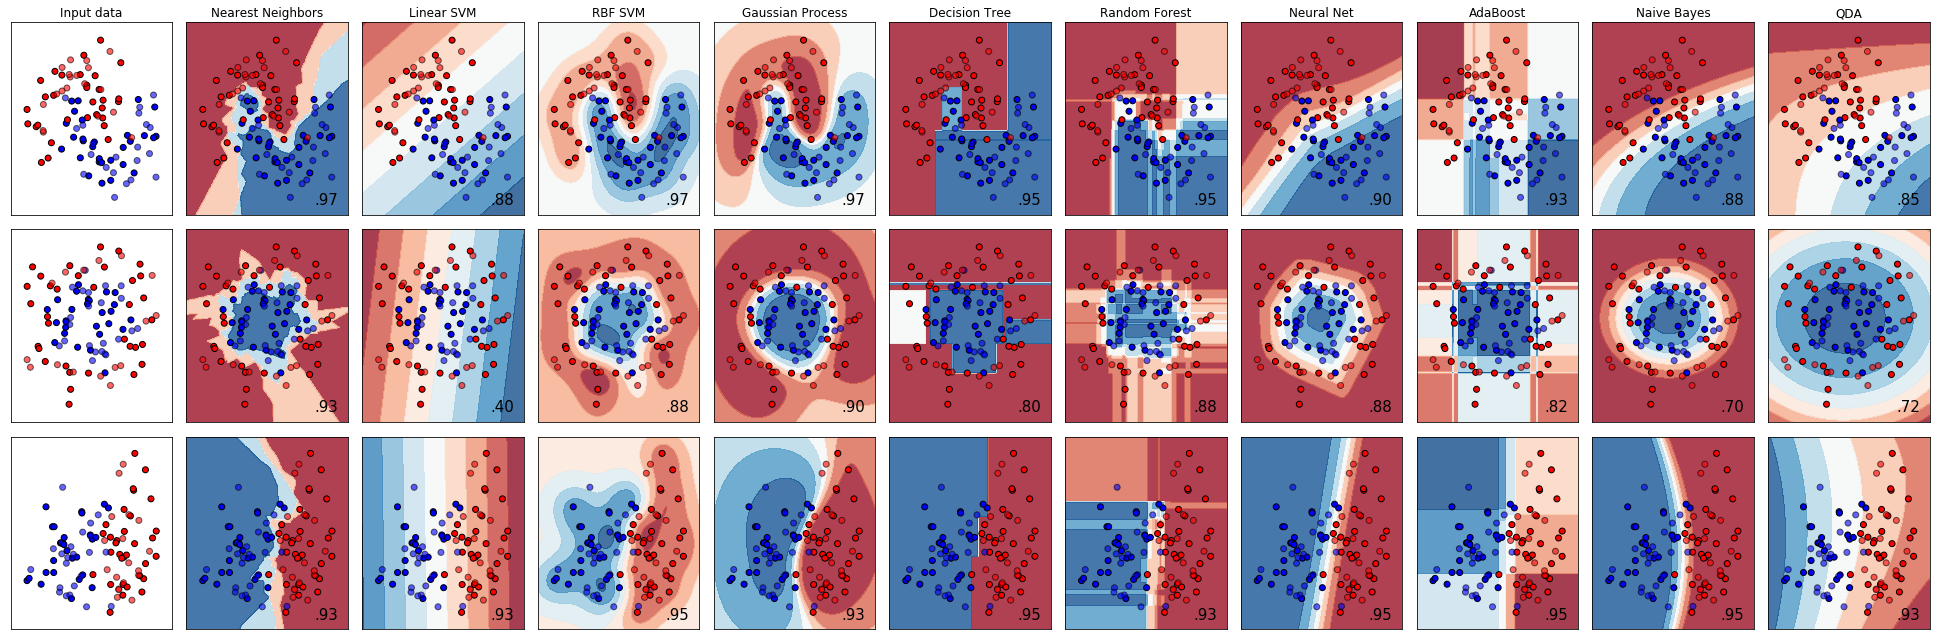

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()


In [66]:
def compare_classifiers(dataset, classifiers):
    # TODO: legend
    # TODO: classifiers
    
    X_train, y_train, X_test, y_test = dataset
    i = 1

    figure = plt.figure(figsize=(27, 9))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # at this moment we have plotted both train and test sets

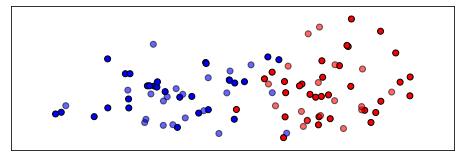

In [67]:
dataset = (X_train, y_train, X_test, y_test)
classifiers = [1,2]
compare_classifiers(dataset, classifiers)